# 20190715 - Experiments Basemodel-V6 

Info:

- Thesis: Robust climate policies
- Author: Mark Hupkens
- SN: 4167813

New in these experiments:

- extra uncertainty district heating

In [1]:
from ema_workbench import(Model, RealParameter,Constant,IntegerParameter,CategoricalParameter, TimeSeriesOutcome,
                          Policy, perform_experiments, ema_logging, save_results, load_results)
from ema_workbench.connectors.vensim import VensimModel  
from ema_workbench.em_framework.evaluators import LHS, SOBOL
import timeit
from ema_workbench import MultiprocessingEvaluator

ema_logging.log_to_stderr(ema_logging.INFO)
import pysd
import numpy.random
import pandas as pd
numpy.random.seed(123456789)

from ema_workbench.connectors.pysd_connector import PysdModel

C:\Users\LocalAdmin\Anaconda3\lib\site-packages\ema_workbench\em_framework\optimization.py:22: ImportWarning: platypus based optimization not available
  warnings.warn("platypus based optimization not available", ImportWarning)
C:\Users\LocalAdmin\Anaconda3\lib\site-packages\ema_workbench\connectors\__init__.py:18: ImportWarning: netlogo connector not available
  warnings.warn("netlogo connector not available", ImportWarning)
C:\Users\LocalAdmin\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\LocalAdmin\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


### Simulation

In [2]:
wd =r'./model/20190707 - Policymodels' # this is the directory where the model is located
model = VensimModel('WorldEnergyModel', wd = wd , model_file='20190715_Energymodel_Labour_basecase.vpm') # model contains only 1 subscript
ema_logging.log_to_stderr(ema_logging.INFO)   # we want to see what EMA is doing


<Logger EMA (DEBUG)>

### Policies
- Basecase experiments, so no policies switched on.

In [3]:
# Select policies

policies = [Policy('None', # turn on all policy switches
                   **{'SWITCH normering nieuwbouw':0,
                      'SWITCH elec efficiency':0,
                      'SWITCH wijkaanpak woningcorp':0,
                      'SWITCH wijkaanpak koop':0,
                     })]

### Uncertainties

Basecase simulations, so no uncertainties sampled for:
- subsidies
- propensities to renovate (fr subsidy over costs [x] income)


In [4]:
# Specify uncertainties and aggregated outcomes
# No policycase, so no uncertaint

uncertainties = [RealParameter('groei gem elek gebruik', -0.01, 0.01),
                 RealParameter('groei nieuwbouw',0.0088,0.0097), 
                 RealParameter('fr innovation CoM', 0.5,0.9),
                 RealParameter('standard renovation rate', 0.0,0.001),
                 RealParameter('policy time', 2020, 2025),
                 RealParameter('renovation costs label group 1', 8000, 12000),
                 RealParameter('renovation costs label group 2', 20000, 28000),
                 RealParameter('renovation costs label group 3', 30000, 36000),
                 RealParameter('renovation costs label group 4', 30000, 40000), 
                 RealParameter('fr reduction renovation costs',0.5,8),
                 RealParameter('fr to district heat wcorp no existing infrastructure',0.1, 0.3),
                 RealParameter('fr to district heat wcorp low existing infrastructure',0.3, 0.7),
                 RealParameter('fr to district heat wcorp high existing infrastructure',0.7, 1.0),
                 RealParameter('fr to district heat koop low existing infrastructure',0.1, 0.3),
                 RealParameter('fr to district heat koop high existing infrastructure',0.3, 0.6),
#                  RealParameter('fr to district heat koop no existing infrastructure',0, 0.1) # weird EMA error, set uncertainty to 0 in model
                
                ]

outcomes = [TimeSeriesOutcome('total renovated houses'),
            TimeSeriesOutcome('total renovated houses wcorp'),
            TimeSeriesOutcome('total renovated houses koop'),
            TimeSeriesOutcome('total renovated houses verhuur'),
            TimeSeriesOutcome('total subsidy amount'),
            TimeSeriesOutcome('total costs'),
            TimeSeriesOutcome('total CO2 emission'),
            TimeSeriesOutcome('total warmte via elek'),
            TimeSeriesOutcome('total warmtenet'),
            TimeSeriesOutcome('total woningen gas'),
            TimeSeriesOutcome('total houses in model'),
            TimeSeriesOutcome('prijseffect schaarste manuren transitie GASnrELEK NL'),
            TimeSeriesOutcome('prijseffect schaarste manuren transitie GASnrWN NL'),
            TimeSeriesOutcome('totaal benodigde manuren transitie GebOmg GASnrELEK NL corp'),
            TimeSeriesOutcome('totaal benodigde manuren transitie GebOmg GASnrWN NL corp'),
            TimeSeriesOutcome('tekort manuren transitie GebOmg GASnrELEK NL'),
            TimeSeriesOutcome('tekort manuren transitie GebOmg GASnrWN NL'),
            TimeSeriesOutcome('beschikbare manuren transitie woningen GASnrWN NL'),
            TimeSeriesOutcome('beschikbare manuren transitie woningen GASnrELEK NL')
           ]

# Set constants: override some of the defaults of the model
constants = [Constant('baseline CoM reduction',1), 
             Constant('CoM elec start', 0.45),
             Constant('CoM gas start', 1.791),
             Constant('CoM heat start', 0.0356)
            ]

In [5]:
len(outcomes)

19

In [6]:
model.uncertainties = uncertainties
model.outcomes = outcomes
model.constants = constants
nr_scenarios = 1000

In [7]:
start_time = timeit.default_timer()

with MultiprocessingEvaluator(model) as evaluator:
    policy_results = evaluator.perform_experiments(scenarios=nr_scenarios, policies=policies) 

elapsed = timeit.default_timer() - start_time
print("Total time in minutes:", elapsed/60, "-- Time per run in seconds:", elapsed/(nr_scenarios*len(policies)))

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 1 policies * 1 model(s) = 1000 experiments
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 300 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 500 cases completed
[MainProcess/INFO] 600 cases completed
[MainProcess/INFO] 700 cases completed
[MainProcess/INFO] 800 cases completed
[MainProcess/INFO] 900 cases completed
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool
[SpawnPoolWorker-4/INFO] finalizing
[SpawnPoolWorker-3/INFO] finalizing
[SpawnPoolWorker-2/INFO] finalizing
[SpawnPoolWorker-1/INFO] finalizing


Total time in minutes: 268.9098323708046 -- Time per run in seconds: 16.134589942248276


In [8]:
save_results(policy_results, r'C:\Users\LocalAdmin\Desktop\ETModel\results\20190715_experiments_energymodel_labour_base_ensempble.tar.gz')

[MainProcess/INFO] results saved successfully to C:\Users\LocalAdmin\Desktop\ETModel\results\20190715_experiments_energymodel_labour_base_ensempble.tar.gz


### Visualization

In [9]:
from ema_workbench import(Model, RealParameter,Constant,IntegerParameter,CategoricalParameter, TimeSeriesOutcome, Policy, perform_experiments, ema_logging, save_results, load_results)

## Import specific plotting commands:  
import matplotlib.pyplot as plt
from ema_workbench.analysis.plotting import lines, plot_lines_with_envelopes, envelopes  
from ema_workbench.analysis.plotting_util import KDE, HIST, VIOLIN, BOXPLOT
import ema_workbench.analysis.pairs_plotting as pairs
import ema_workbench.analysis.plotting as emaplt

%matplotlib inline
import seaborn as sns
sns.set()
plt.rcParams["figure.figsize"] = (20,8)

C:\Users\LocalAdmin\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


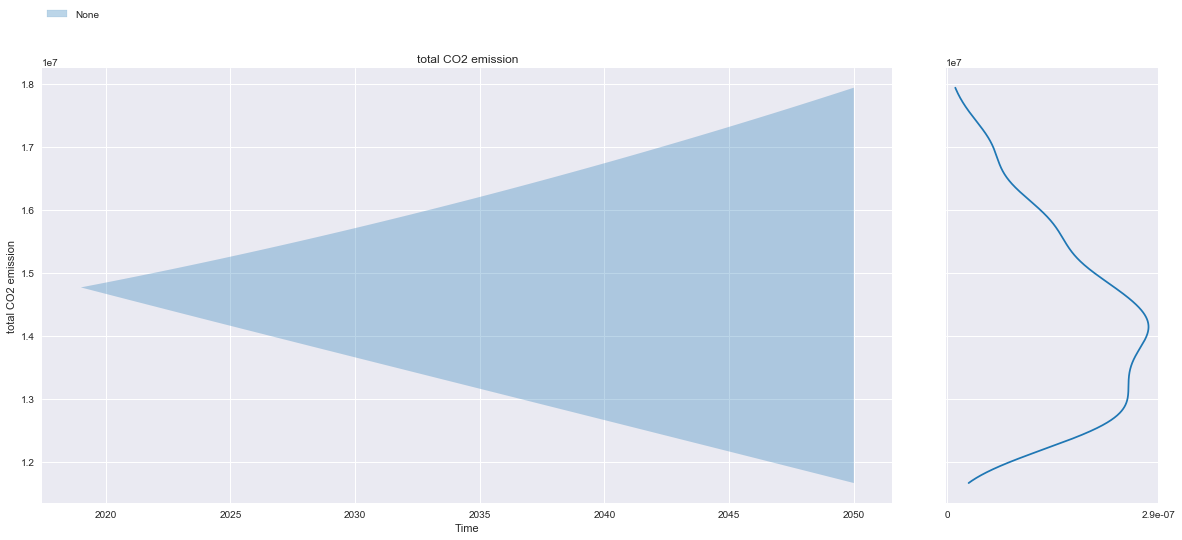

In [10]:
fig = envelopes(policy_results, outcomes_to_show=('total CO2 emission'), fill=True , group_by='policy', density=KDE)

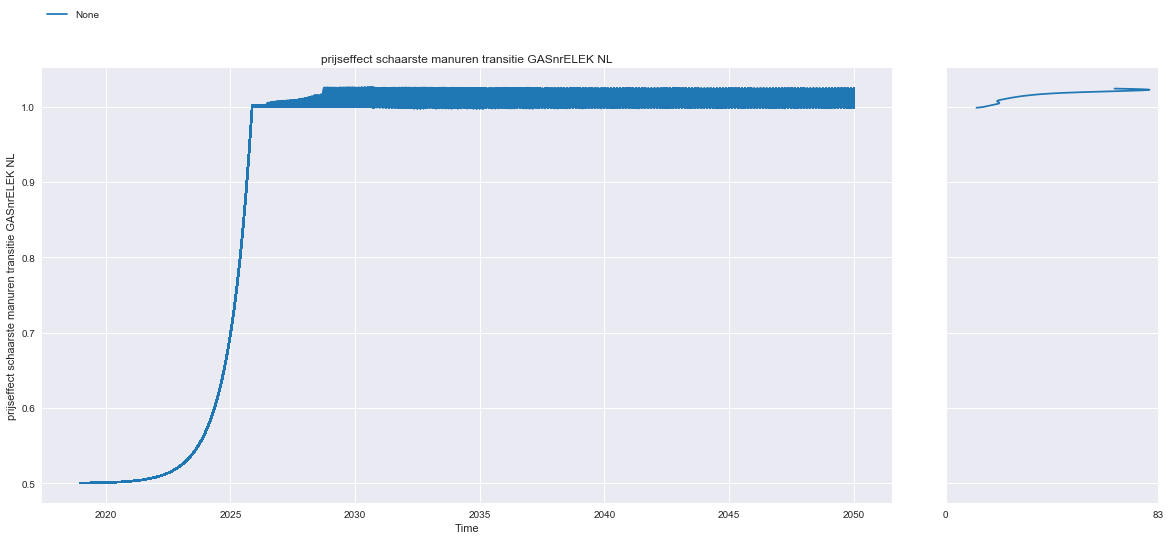

In [11]:
fig=lines(policy_results,outcomes_to_show='prijseffect schaarste manuren transitie GASnrELEK NL', group_by='policy', density=KDE)

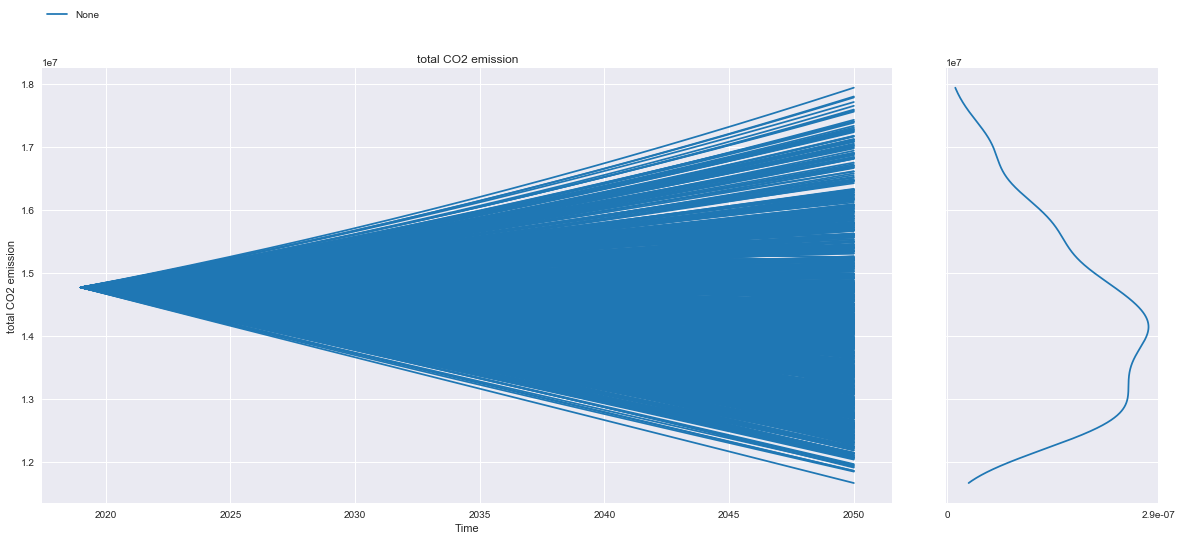

In [12]:
fig = lines(policy_results, outcomes_to_show=('total CO2 emission'), group_by='policy', density=KDE)